In [36]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def int_approx(f,a,b):
    return (b-a)*np.mean(f)

# Choose values realistically. But also make sure that 3Kn can at max equal d_av (otherwise, you'll have a math inconsistency) 
K = 0.125
d_av = 0.01 # within the range of 'Silt'
n = d_av*0.2

# We need integral of r^2 * Gaussian distr, in ranges (-inf to d) as well as (-inf to inf)
def SCDF(r):
    a = 2*(K**2)*(n**2) # 2K^2n^2 = a
    d = K*d_av
    return (1/np.sqrt(np.pi*a))*np.exp((-1*(r-d)**2)/a)

def f(r):
    return (r**2)*SCDF(r)

h = np.linspace(d_av, 2*29.78322/(K*d_av), 10000)

a = 0 # Equivalent of -inf
b1 = 2*K*d_av # This is the equivalent of inf (If you increase b1, the value of the integral won't increase much further)

x_range1 = np.arange(a,b1+0.000011,.000001)
fx1 = f(x_range1)
SCDF1 = SCDF(x_range1)

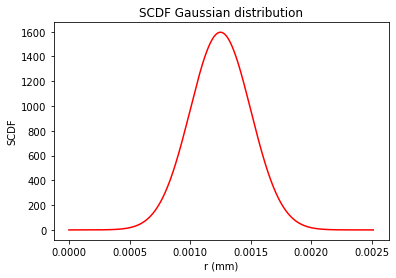

In [37]:
plt.plot(x_range1, SCDF1, color='red')
plt.xlabel("r (mm)")
plt.ylabel("SCDF")
plt.title("SCDF Gaussian distribution")
plt.show()

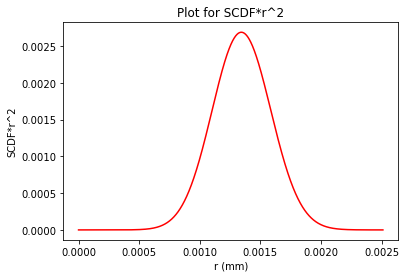

In [38]:
plt.plot(x_range1, fx1, color='red')
plt.xlabel("r (mm)")
plt.ylabel("SCDF*r^2")
plt.title("Plot for SCDF*r^2")
plt.show()

In [39]:
Dr = int_approx(fx1,a,b1)
print("Dr: ",Dr)

Dr:  1.6172357908133826e-06


h at SWC<0.01 =  38188.291512751275
h_av =  23826.576


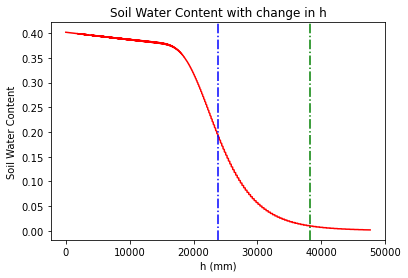

In [73]:
SWCarr = []
h01 = -1
h_av = 29.78322/(K*d_av)
E = 0.4 # porosity

for hi in h:
    b2 = 29.78322/hi

#     print("b2: ", b2)

    x_range2 = np.arange(a,b2+0.00011,.00001)
    fx2 = f(x_range2)
    Nr = int_approx(fx2,a,b2)
#     print("Nr: ",Nr)

    # Calculating the SWC value

    SWC = E*Nr/Dr
    if(SWC<0.01):
        if(h01==-1):
            h01 = hi
#     print("SWC: ",SWC)
    SWCarr.append(SWC)

# print(SWCarr)

plt.plot(h, SWCarr, color='red')
plt.axvline(linewidth = 1.5, x = h_av, color = 'b',linestyle="-.")
plt.axvline(linewidth = 1.5, x = h01, color = 'g',linestyle="-.")

print("h at SWC<0.01 = ",h01)
print("h_av = ",h_av)

plt.xlabel("h (mm)")
plt.ylabel("Soil Water Content") 
plt.title("Soil Water Content with change in h")
plt.show()

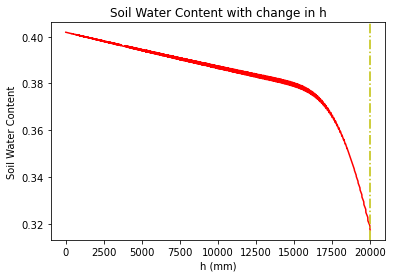

In [87]:
plt.plot(h[:4200], SWCarr[:4200], color='red')
plt.axvline(linewidth = 1.5, x = 20000, color = 'y',linestyle="-.")

plt.xlabel("h (mm)")
plt.ylabel("Soil Water Content") 
plt.title("Soil Water Content with change in h")
plt.show()

### Now we need to consider the Sandy soil case. 
We'll start over with these new values and see the results.

In [88]:
# Choose values realistically. But also make sure that 3Kn can at max equal d_av (otherwise, you'll have a math inconsistency) 
K = 0.125
d_av = 0.4 # within the range of 'Silt'
n = d_av*0.3

h = np.linspace(d_av, 2*29.78322/(K*d_av), 10000)

a = 0 # Equivalent of -inf
b1 = 2*K*d_av # This is the equivalent of inf (If you increase b1, the value of the integral won't increase much further)

x_range1 = np.arange(a,b1+0.000011,.000001)
fx1 = f(x_range1)
SCDF1 = SCDF(x_range1)

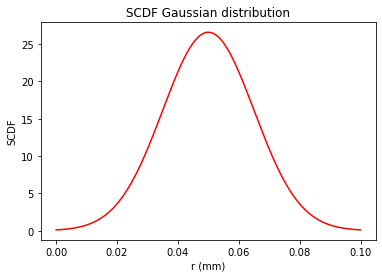

In [89]:
plt.plot(x_range1, SCDF1, color='red')
plt.xlabel("r (mm)")
plt.ylabel("SCDF")
plt.title("SCDF Gaussian distribution")
plt.show()

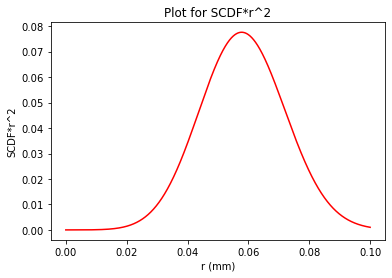

In [90]:
plt.plot(x_range1, fx1, color='red')
plt.xlabel("r (mm)")
plt.ylabel("SCDF*r^2")
plt.title("Plot for SCDF*r^2")
plt.show()

In [91]:
Dr = int_approx(fx1,a,b1)
print("Dr: ",Dr)

Dr:  0.002720059780620879


h at SWC<0.01 =  838.8977249724971
h_av =  595.6644


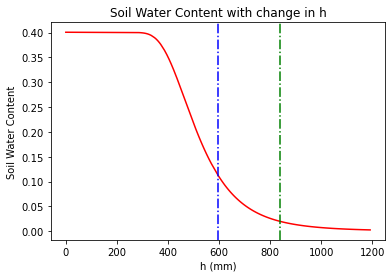

In [93]:
SWCarr = []
h01 = -1
h_av = 29.78322/(K*d_av)
E = 0.4 # porosity

for hi in h:
    b2 = 29.78322/hi

#     print("b2: ", b2)

    x_range2 = np.arange(a,b2+0.00011,.00001)
    fx2 = f(x_range2)
    Nr = int_approx(fx2,a,b2)
#     print("Nr: ",Nr)

    # Calculating the SWC value

    SWC = E*Nr/Dr
    if(SWC<0.02):
        if(h01==-1):
            h01 = hi
#     print("SWC: ",SWC)
    SWCarr.append(SWC)

# print(SWCarr)

plt.plot(h, SWCarr, color='red')
plt.axvline(linewidth = 1.5, x = h_av, color = 'b',linestyle="-.")
plt.axvline(linewidth = 1.5, x = h01, color = 'g',linestyle="-.")

print("h at SWC<0.01 = ",h01)
print("h_av = ",h_av)

plt.xlabel("h (mm)")
plt.ylabel("Soil Water Content") 
plt.title("Soil Water Content with change in h")
plt.show()

Groundwater profile with distance from the oasis:
Assume it follows a parabolic profile. 

`y = (2 + 0.01x^2) m`

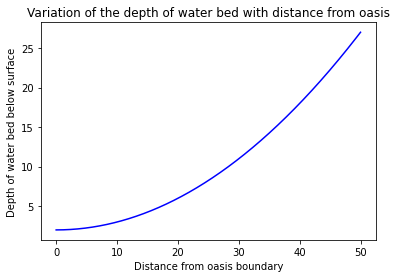

In [97]:
def f(x):
    return (2+0.01*x**2)

xvalues = np.arange(0,50,0.01)
fx = f(xvalues)
plt.plot(xvalues,fx,color="b")
plt.xlabel("Distance from oasis boundary")
plt.ylabel("Depth of water bed below surface")
plt.title("Variation of the depth of water bed with distance from oasis")
plt.show()